# PROJECT OVERVIEW

In this project, I will focus on data cleaning, imputation, analysis, and visualization to derive valuable insights for a business stakeholder.

## Business understanding

# Import necessary libraries to be used in the project

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

from pandas.errors import DtypeWarning

warnings.filterwarnings("ignore", category=DtypeWarning)

# Load the dataset

In [2]:
df = pd.read_csv("AviationData.csv",encoding = 'Windows-1252')


# Data sanity check

In [3]:
#This gives us the shape of the dataset.It has (88889)rows and (31)collumns
df.shape


(88889, 31)

In [4]:
#This give an outline of the first 5 rows of the dataset
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
#This give an outline of the last 5 rows of the dataset
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [6]:
#Gives a look into the columns inside the dataframe
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [7]:
#This gives us the summary statistics of the dataset
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [8]:
df.describe(include="object")

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50249,52790,...,88787,81812,32023,12582,82697,16648,84397,61724,82508,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10375,24871,...,2,13,31,3,26,13590,4,12,17075,2924
top,20001212X19172,Accident,DCA23WA071,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


In [9]:
#This gives the total overview of our dataset
#From the look of the data, we have a couple of missing data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [10]:
#Now lets find the missing values 
#Well,we have a number of collumns that have missing values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [11]:
#Lets now check the percentage of missing values in the columns so as it can give us insights on what columns we would drop
df.isna().sum()/len(df)*100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

Great, We now know what columns have massive numbers of missing data and dropping them will be neccessary. Not droping them would affect what I really want to achieve.

# Cleaning the dataset


droping the collumns that wont be needed. All the columns that I would be droping I will be storing them in the columns_dropped variable.

In [12]:
#placing unneccessary columns in a variable
columns_dropped = ['Accident.Number','Location', 'Country','Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Registration.Number', 'FAR.Description',
'Schedule','Air.carrier', 'Publication.Date']

In [13]:
#droping the columns from the original dataframe to refined one
cleaned_df = df.drop(columns=columns_dropped)

In [14]:
#first five rows of the dataset
cleaned_df.head(20)


,Event.Id,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,1948-10-24,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,1962-07-19,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,1974-08-30,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,1977-06-19,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,1979-08-02,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
5,20170710X52551,Accident,1979-09-17,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause
6,20001218X45446,Accident,1981-08-01,Fatal(4),Destroyed,NaN,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause
7,20020909X01562,Accident,1982-01-01,Non-Fatal,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause
8,20020909X01561,Accident,1982-01-01,Non-Fatal,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause
9,20020909X01560,Accident,1982-01-01,Non-Fatal,Substantial,NaN,North American,NAVION L-17B,No,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause


In [15]:
#finding duplicates
cleaned_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
88884    False
88885    False
88886    False
88887    False
88888    False
Length: 88889, dtype: bool

In [16]:
#Checking out the duplicates and printing them out
duplicates = cleaned_df[df.duplicated()]

print(duplicates)

Empty DataFrame
Columns: [Event.Id, Investigation.Type, Event.Date, Injury.Severity, Aircraft.damage, Aircraft.Category, Make, Model, Amateur.Built, Number.of.Engines, Engine.Type, Purpose.of.flight, Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured, Weather.Condition, Broad.phase.of.flight, Report.Status]
Index: []


In [17]:
#Choosing a primary key which helps in removing duplicates
cleaned_df = cleaned_df.drop_duplicates(subset="Event.Id")

In [18]:
#Now lets do a quick check at our dataframe to see if there are duplicates 
duplicate_count = cleaned_df.duplicated().sum()
duplicate_count
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


Great, We dropped the duplicates. 

EDA

In [19]:
import warnings
warnings.filterwarnings('ignore')
def clean_aircraft_category(value):
    if pd.isna(value) or value.strip() == "":
        return "Unknown"
    return value.strip().title()

# Apply it to the column
cleaned_df["Aircraft.Category"] = cleaned_df["Aircraft.Category"].apply(clean_aircraft_category)

In [20]:
cleaned_df.head()

,Event.Id,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,1948-10-24,Fatal(2),Destroyed,Unknown,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,1962-07-19,Fatal(4),Destroyed,Unknown,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,1974-08-30,Fatal(3),Destroyed,Unknown,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,1977-06-19,Fatal(2),Destroyed,Unknown,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,1979-08-02,Fatal(1),Destroyed,Unknown,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


In [21]:
cleaned_df.isna().sum()

Event.Id                      0
Investigation.Type            0
Event.Date                    0
Injury.Severity             990
Aircraft.damage            3103
Aircraft.Category             0
Make                         63
Model                        92
Amateur.Built               100
Number.of.Engines          6027
Engine.Type                7024
Purpose.of.flight          6122
Total.Fatal.Injuries      11267
Total.Serious.Injuries    12322
Total.Minor.Injuries      11760
Total.Uninjured            5863
Weather.Condition          4473
Broad.phase.of.flight     27114
Report.Status              6361
dtype: int64

In [22]:
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == 'object':
        # Categorical: Fill with mode (most frequent value)
        cleaned_df[column] = cleaned_df[column].fillna(cleaned_df[column].mode()[0])
    else:
        # Numerical: Fill with median
        cleaned_df[column] = cleaned_df[column].fillna(cleaned_df[column].median())

In [23]:
cleaned_df.head()

,Event.Id,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,1948-10-24,Fatal(2),Destroyed,Unknown,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,1962-07-19,Fatal(4),Destroyed,Unknown,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,1974-08-30,Fatal(3),Destroyed,Unknown,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,1977-06-19,Fatal(2),Destroyed,Unknown,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,1979-08-02,Fatal(1),Destroyed,Unknown,Cessna,501,No,1.0,Reciprocating,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause


In [24]:
cleaned_df.isna().sum()

Event.Id                  0
Investigation.Type        0
Event.Date                0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
dtype: int64

In [25]:
import warnings
warnings.filterwarnings('ignore')
cleaned_df['Make'] = cleaned_df['Make'].str.upper()

In [26]:
cleaned_df.head()

,Event.Id,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,1948-10-24,Fatal(2),Destroyed,Unknown,STINSON,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,1962-07-19,Fatal(4),Destroyed,Unknown,PIPER,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,1974-08-30,Fatal(3),Destroyed,Unknown,CESSNA,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,1977-06-19,Fatal(2),Destroyed,Unknown,ROCKWELL,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,1979-08-02,Fatal(1),Destroyed,Unknown,CESSNA,501,No,1.0,Reciprocating,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause


In [27]:
#This filters out data set for it to have Aircraft category of only unknown,airplane and helicopter
cleaned_df[cleaned_df['Aircraft.Category'].isin(['Unknown', 'Airplane', 'Helicopter'])].head()


,Event.Id,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,1948-10-24,Fatal(2),Destroyed,Unknown,STINSON,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,1962-07-19,Fatal(4),Destroyed,Unknown,PIPER,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,1974-08-30,Fatal(3),Destroyed,Unknown,CESSNA,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,1977-06-19,Fatal(2),Destroyed,Unknown,ROCKWELL,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,1979-08-02,Fatal(1),Destroyed,Unknown,CESSNA,501,No,1.0,Reciprocating,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause


# Visualizations


You have a column Event.Date, which stores full dates like '2010-03-15'.

But if you want to group by year, you need a new column that only contains the year part, like 2010.

Pandas can extract the year from a datetime column using .dt.year.

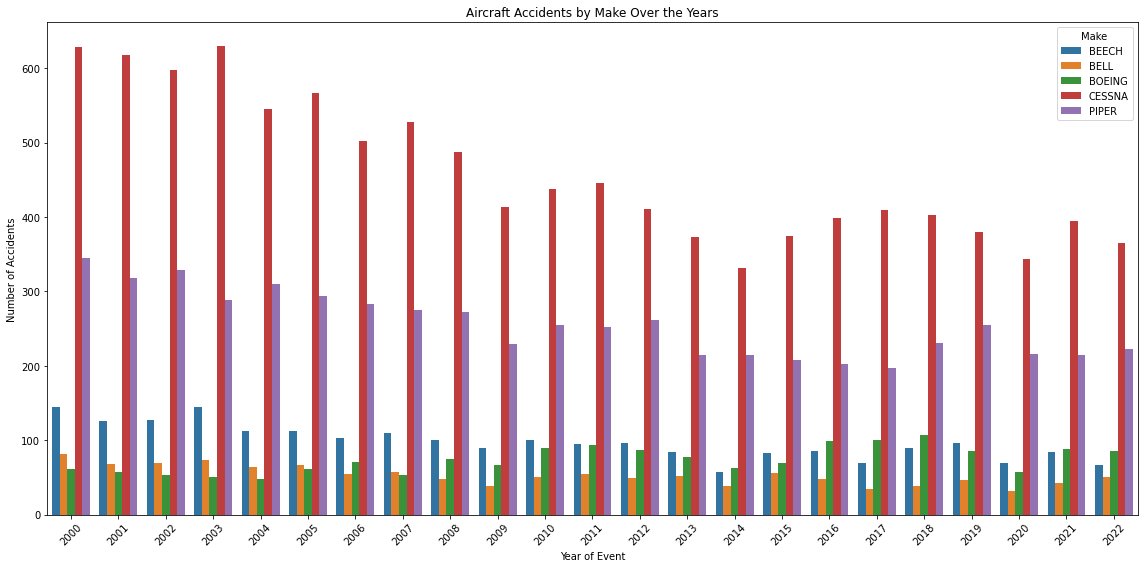

In [32]:
cleaned_df['Event.Date'] = pd.to_datetime(cleaned_df['Event.Date'], errors='coerce')

# Create Event.Year column
cleaned_df['Event.Year'] = cleaned_df['Event.Date'].dt.year

grouped = cleaned_df.groupby(['Event.Year', 'Make']).size().reset_index(name='Accident Count')

# Optional: Filter recent years and top makes
grouped = grouped[grouped['Event.Year'] >= 2000]
top_makes = cleaned_df['Make'].value_counts().head(5).index
grouped = grouped[grouped['Make'].isin(top_makes)]

# 4. Plot
plt.figure(figsize=(16,8))
ax = sns.barplot(data=grouped, x='Event.Year', y='Accident Count', hue='Make', dodge=True, palette='tab10')

# 5. Customize with ax.set_*
ax.set_title('Aircraft Accidents by Make Over the Years')
ax.set_xlabel('Year of Event')
ax.set_ylabel('Number of Accidents')
ax.legend(title='Make', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

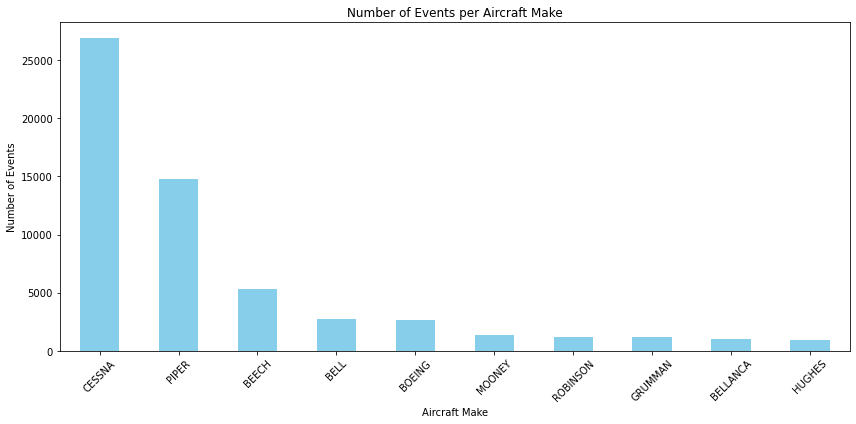

In [29]:
# Group by 'Make' and count unique 'Event.Id'
event_counts = cleaned_df.groupby('Make')['Event.Id'].nunique().sort_values(ascending=False)

# Optional: Limit to top N for better visibility, e.g., top 10 makes
top_makes = event_counts.head(10)

# Plot
plt.figure(figsize=(12,6))
top_makes.plot(kind='bar', color='skyblue')

plt.title('Number of Events per Aircraft Make')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()